In [10]:
from sklearn.datasets import load_iris
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.functional as F

In [2]:
# Load iris data
data = load_iris()

In [76]:
# Get features and targets
X = data.data
Y = data.target
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [77]:
# Deep learning network would take the shape of d x n tensor  
d = X.shape[1]
n = X.shape[0]

In [93]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [94]:
# Apply standard scaler on the features to transform features to new values
# These values will have mean 0 and std of 1
# This helps model to converge faster

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
# Convert numpy array into Tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train =torch.from_numpy(Y_train.astype(np.long))
Y_test = torch.from_numpy(Y_test.astype(np.long))

In [117]:
# Define the model
# As we are using CrossEntropyLoss, we do not require sof
model = nn.Sequential(
          nn.Linear(d, 3)
        )

In [118]:
# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.003)

In [119]:
n_epochs = 1000
train_losses = []
test_losses = []
accuracy = []

for epoch in range(n_epochs):
  optimizer.zero_grad()

  # Perform forward propagation
  output = model(X_train)
  train_loss = criterion(output, Y_train)
  
  # Measure test loss
  output_test = model(X_test)
  test_loss = criterion(output_test, Y_test)

  # Perform backward propagation and update parameters
  train_loss.backward()
  optimizer.step()
  
  if (epoch+1)%50 == 0:
    pred = torch.argmax(output, dim = 1)
    correct = pred.eq(Y_train)
    acc = torch.mean(correct.float())
    accuracy.append(acc)
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    print(f' Epoch: {epoch+1}/{n_epochs} train_loss: {train_loss.item():.2f} test_loss: {test_loss.item():.2f} traing_accuracy: {acc:.2f}')


 Epoch: 50/1000 train_loss: 1.19 test_loss: 1.24 traing_accuracy: 0.28
 Epoch: 100/1000 train_loss: 0.88 test_loss: 0.90 traing_accuracy: 0.75
 Epoch: 150/1000 train_loss: 0.69 test_loss: 0.73 traing_accuracy: 0.86
 Epoch: 200/1000 train_loss: 0.59 test_loss: 0.63 traing_accuracy: 0.85
 Epoch: 250/1000 train_loss: 0.52 test_loss: 0.57 traing_accuracy: 0.86
 Epoch: 300/1000 train_loss: 0.47 test_loss: 0.53 traing_accuracy: 0.87
 Epoch: 350/1000 train_loss: 0.43 test_loss: 0.49 traing_accuracy: 0.88
 Epoch: 400/1000 train_loss: 0.40 test_loss: 0.47 traing_accuracy: 0.90
 Epoch: 450/1000 train_loss: 0.37 test_loss: 0.45 traing_accuracy: 0.91
 Epoch: 500/1000 train_loss: 0.35 test_loss: 0.43 traing_accuracy: 0.92
 Epoch: 550/1000 train_loss: 0.33 test_loss: 0.41 traing_accuracy: 0.93
 Epoch: 600/1000 train_loss: 0.31 test_loss: 0.40 traing_accuracy: 0.96
 Epoch: 650/1000 train_loss: 0.29 test_loss: 0.38 traing_accuracy: 0.96
 Epoch: 700/1000 train_loss: 0.27 test_loss: 0.37 traing_accuracy

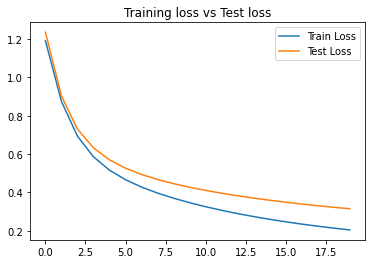

In [121]:
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.title('Training loss vs Test loss')
plt.show()

In [130]:
test_accuracy = []
model.eval()
with torch.no_grad():
  test_output = model(X_test)
  test_pred = torch.argmax(test_output, dim = 1)
  correct = test_pred.eq(Y_test)
  test_acc = torch.mean(correct.float())
print(f'Validation data accuracy: {test_acc:.2f}')

Validation data accuracy: 0.93
